In [1]:
account_id = '6c596b7d-a814-4b9b-bb03-15e28f113024'
location = 'Trial'
subscription_key = '9f34560c389646888a864897e3c58c34'

In [2]:
import urllib.parse, http.client, json

url = 'api.videoindexer.ai'

params = urllib.parse.urlencode({
    'allowEdit':True
})
endpoint = '/auth/{0}/Accounts/{1}/AccessToken?{2}'.format(location, account_id, params)
headers = {
    'Ocp-Apim-Subscription-Key':subscription_key
}

try:
    conn = http.client.HTTPSConnection(url)
    conn.request('GET', endpoint, '', headers)
    response = conn.getresponse()
    jsonData = response.read()
    token = json.loads(jsonData)
    print(token)
    conn.close()
except Exception as ex:
    print(ex)

eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJWZXJzaW9uIjoiMi4wLjAuMCIsIktleVZlcnNpb24iOiJjNTgzMDU1YjU5MmI0MTE5YTY3Njg1ZDg5NzI0NmVjOCIsIkFjY291bnRJZCI6IjZjNTk2YjdkLWE4MTQtNGI5Yi1iYjAzLTE1ZTI4ZjExMzAyNCIsIkFjY291bnRUeXBlIjoiVHJpYWwiLCJQZXJtaXNzaW9uIjoiQ29udHJpYnV0b3IiLCJFeHRlcm5hbFVzZXJJZCI6IjE6bGl2ZS5jb206MDAwM0JGRkQxMTI5RTIyMyIsIlVzZXJUeXBlIjoiTWljcm9zb2Z0Q29ycEFhZCIsIklzc3VlckxvY2F0aW9uIjoiVHJpYWwiLCJuYmYiOjE3NTExOTkzNDEsImV4cCI6MTc1MTIwMzI0MSwiaXNzIjoiaHR0cHM6Ly9hcGkudmlkZW9pbmRleGVyLmFpLyIsImF1ZCI6Imh0dHBzOi8vYXBpLnZpZGVvaW5kZXhlci5haS8ifQ.AuQYGUotlIrvEnJZ8XTOADPPlfXgChxI7AWIr0c3HoNM3qcr07ghJ9JC7WoP2OFpQ2kdCuGmULkJiTUdEU8Xff9RhqBV39dssZTz1zIbPac5YUNPpodtEE8kMyWHuREy7Z3JAnpuPAOCjP_5URJCrSe466p1V86SfZH13G0T_dQo8CEg0cW-mqpKxjEY4sXAC_pOuWki8SifPQPHPf5q9fxSW7AmEDweUCrrb59SWw4xfYUPmmhyo_ojomRM3pHj9wuyp84JwMhjwD1BbkXQm57N0hg-JAfTuSz_fTO8Y01nmsOAJ25oE4b4WbI84kenwk-FliUY4NMeweBItPEKIg


In [18]:
video_params = urllib.parse.urlencode({
    'accessToken':token,
    'name':'Day 3 of Vocabulary Challenges',
    'videoUrl':'https://github.com/vipinmadhummal/testvideo/raw/67c6d692643f4572208d5cbe87f056f54434e341/Camera%20Recording%20-%20Feb%2026%2C%202025-VEED-VEED.mp4',
    'language':'es-ES',
    'description':'Vocabulary'
})
video_endpoint = '/{0}/Accounts/{1}/Videos?{2}'.format(location, account_id, video_params)
video_headers = {
    'Content-Type':'multipart/form-data'
}

try:
    conn = http.client.HTTPSConnection(url)
    conn.request('POST', video_endpoint, '', video_headers)
    response = conn.getresponse()
    jsonData = response.read()
    video_data = json.loads(jsonData)
    print(video_data)
    conn.close()
except Exception as ex:
    print(ex)

{'accountId': '6c596b7d-a814-4b9b-bb03-15e28f113024', 'id': 'ualg8thxw2', 'partition': None, 'externalId': None, 'metadata': None, 'name': 'Day 3 of Vocabulary Challenges', 'description': 'Vocabulary', 'created': '2025-06-29T12:40:12.5266667+00:00', 'lastModified': '2025-06-29T12:40:12.5266667+00:00', 'lastIndexed': '2025-06-29T12:40:12.5266667+00:00', 'privacyMode': 'Private', 'userName': 'Vipin Madhummal', 'isOwned': True, 'isBase': True, 'hasSourceVideoFile': True, 'state': 'Uploaded', 'moderationState': 'OK', 'reviewState': 'None', 'isSearchable': True, 'processingProgress': '1%', 'durationInSeconds': 0, 'thumbnailVideoId': 'ualg8thxw2', 'thumbnailId': '00000000-0000-0000-0000-000000000000', 'searchMatches': [], 'indexingPreset': 'Default', 'streamingPreset': 'Default', 'sourceLanguage': 'es-ES', 'sourceLanguages': ['es-ES'], 'personModelId': '00000000-0000-0000-0000-000000000000'}


In [19]:
video_id = video_data['id']
print(video_id)

ualg8thxw2


In [23]:
index_params = urllib.parse.urlencode({
    'accessToken':token,
    'language':'en-US'
})
index_endpoint = '/{0}/Accounts/{1}/Videos/{2}/Index?{3}'.format(location, account_id, video_id, index_params)

try:
    conn = http.client.HTTPSConnection(url)
    conn.request('GET', index_endpoint, '', {})
    response = conn.getresponse()
    jsonData = response.read()
    index_data = json.loads(jsonData)
    print(index_data['state'])
    conn.close()
except Exception as ex:
    print(ex)

Processed


In [24]:
if(index_data['state'] == 'Processed'):
    print(json.dumps(index_data, indent=2))

{
  "partition": null,
  "description": "Vocabulary",
  "privacyMode": "Private",
  "state": "Processed",
  "accountId": "6c596b7d-a814-4b9b-bb03-15e28f113024",
  "id": "ualg8thxw2",
  "name": "Day 3 of Vocabulary Challenges",
  "userName": "Vipin Madhummal",
  "created": "2025-06-29T12:40:12.5233333+00:00",
  "isOwned": true,
  "isEditable": true,
  "isBase": true,
  "durationInSeconds": 30,
  "duration": "0:00:30",
  "summarizedInsights": {
    "name": "Day 3 of Vocabulary Challenges",
    "id": "ualg8thxw2",
    "privacyMode": "Private",
    "duration": {
      "time": "0:00:30",
      "seconds": 30
    },
    "thumbnailVideoId": "ualg8thxw2",
    "thumbnailId": "da08b03e-8454-4be4-8e8c-370405068780",
    "faces": [],
    "keywords": [
      {
        "isTranscript": false,
        "id": 1,
        "name": "working",
        "appearances": [
          {
            "startTime": "0:00:25",
            "endTime": "0:00:29.96",
            "startSeconds": 25,
            "endSeconds": 

In [25]:
face_to_update = index_data['summarizedInsights']

thumbnail_params = urllib.parse.urlencode({
    'accessToken':token
})
thumbnail_endpoint = '/{0}/Accounts/{1}/Videos/{2}/Thumbnails/{3}?{4}'.format(location, account_id, face_to_update['id'], face_to_update['thumbnailId'], thumbnail_params)

try:
    conn = http.client.HTTPSConnection(url)
    conn.request('GET', thumbnail_endpoint, '', {})
    response = conn.getresponse()
    thumbnail = response.read()
    print(thumbnail)
    conn.close()
except Exception as ex:
    print(ex)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00\x10Lavc59.37.100\x00\xff\xdb\x00C\x00\x08\n\n\x0b\n\x0b\r\r\r\r\r\r\x10\x0f\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x12\x12\x12\x15\x15\x15\x12\x12\x12\x10\x10\x12\x12\x14\x14\x15\x15\x17\x17\x17\x15\x15\x15\x15\x17\x17\x19\x19\x19\x1e\x1e\x1c\x1c##$++3\xff\xc4\x00\xb1\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x05\x07\x03\x04\x02\x01\x00\x08\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x10\x00\x02\x01\x03\x02\x03\x06\x02\x07\x03\x08\x08\x06\x02\x03\x01\x01\x02\x03\x04\x00\x11\x12!\x05A1q"Qa\x13\x06\x812\x91B\xa1#\x143\xb1r\xc1\xd1\xd2\x82\xe1R4$\xf0\x15\xa2\xf1\x16b\x935CS\x92\xc2\xb3%\x83\xb2cDst\xd3V\x11\x00\x02\x02\x01\x03\x02\x05\x03\x02\x04\x06\x03\x01\x00\x00\x00\x00\x01\x02\x11\x031!\x12AQ\x13\x04aq"\x912\x81bBR\xa1\xc1\xd1\xb1D\x92\x143\xf0\x05\xe1\xb2r\xff\xc0\x00\x11\x08\x00\xd8\x01\x80\x03\x01"\x00\x02\x11\x00

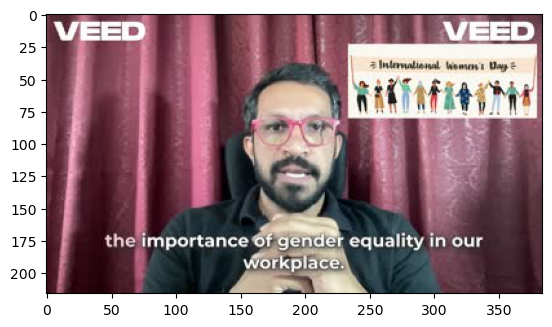

In [26]:
from PIL import Image
import io
import matplotlib.pyplot as plt

image = Image.open(io.BytesIO(thumbnail))
plt.imshow(image)
plt.show()

In [27]:
update_face_params = urllib.parse.urlencode({
    'accessToken':token,
    'newName':'Vipin'
})
update_face_endpoint = '/{0}/Accounts/{1}/Videos/{2}/Index/Faces/{3}?{4}'.format(location, account_id, face_to_update['id'], face_to_update['id'], update_face_params)

try:
    conn = http.client.HTTPSConnection(url)
    conn.request('PUT', update_face_endpoint, '', {})
    response = conn.getresponse()
    print(response.status)
    data = response.read()
    print(data)
    conn.close()
except Exception as ex:
    print(ex)

400
b'{"ErrorType":"INVALID_INPUT","Message":"Request payload is invalid.\\n faceId: The value \'ualg8thxw2\' is not valid.\\n. Trace id: \'9f0d5f79-132f-4112-8e7b-d75a97aa040e\'."}'
